<a href="https://colab.research.google.com/github/Temple2001/ML_practice/blob/main/codes/MNIST_practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1
**입력 데이터 정규화, 정답데이터 one-hot encoding**

In [7]:
import numpy as np

try:

    training_data = np.loadtxt('sample_data/mnist_train_small.csv', delimiter=',', dtype=np.float32)

    print('training_data.shape = ', training_data.shape)

    training_input_data = training_data[:, 1:]
    training_target_data = training_data[:, 0]

    print('training_input_data.shape = ', training_input_data.shape, ', training_target_data.shape = ', training_target_data.shape)

except Exception as err:

    print('Exception occur !!')

training_data.shape =  (20000, 785)
training_input_data.shape =  (20000, 784) , training_target_data.shape =  (20000,)


In [8]:
max_input_val = np.max(training_input_data)
max_target_val = np.max(training_target_data)

min_input_val = np.min(training_input_data)
min_target_val = np.min(training_target_data)

print('max_input_val = ', max_input_val, ', max_target_val = ', max_target_val)
print('min_input_val = ', min_input_val, ', min_target_val = ', min_target_val)

max_input_val =  255.0 , max_target_val =  9.0
min_input_val =  0.0 , min_target_val =  0.0


In [9]:
each_max_val = np.max(training_input_data, axis=1)    # 각 행의 최대값
each_min_val = np.min(training_input_data, axis=1)    # 각 행의 최소값

print('each_max_val = ', each_max_val, ', len(each_max_val) = ', len(each_max_val))
print('each_min_val = ', each_min_val, ', len(each_min_val) = ', len(each_min_val))

# axis = 0 지정하면 각 열의 최대 값과 최소 값을 구할 수 있다

each_max_val =  [255. 255. 255. ... 254. 255. 255.] , len(each_max_val) =  20000
each_min_val =  [0. 0. 0. ... 0. 0. 0.] , len(each_min_val) =  20000


In [10]:
for index in range(len(training_data)):

    input_data = ((training_data[index, 1:] / 255.0) * 0.99) + 0.01

    max_val = np.max(input_data)
    min_val = np.min(input_data)

    target_data = np.zeros(10) + 0.01
    target_data[int(training_data[index, 0])] = 0.99

    if index % 2000 == 0:

        print('=========================================================================')
        print('index = ', index, ', max_val = ', max_val, ', min_val = ', min_val)
        print('index = ', index, ', target_data = ', target_data)

index =  0 , max_val =  1.0 , min_val =  0.01
index =  0 , target_data =  [0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01]
index =  2000 , max_val =  1.0 , min_val =  0.01
index =  2000 , target_data =  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]
index =  4000 , max_val =  1.0 , min_val =  0.01
index =  4000 , target_data =  [0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
index =  6000 , max_val =  1.0 , min_val =  0.01
index =  6000 , target_data =  [0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
index =  8000 , max_val =  1.0 , min_val =  0.01
index =  8000 , target_data =  [0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01]
index =  10000 , max_val =  0.99611765 , min_val =  0.01
index =  10000 , target_data =  [0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01]
index =  12000 , max_val =  1.0 , min_val =  0.01
index =  12000 , target_data =  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]
index =  14000 , max_val =  1.0 , min_val =  0.01
index =  14000 , targ

# Example 2
**np.random.rand() 이용한 가중치 초기화, 은닉층 노드 1개**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [12]:
class MNIST_Test:

    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # 은닉층 가중치  W2  Xavier/He 방법으로 self.W2 가중치 초기화
        #self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        #self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3  Xavier/He 방법으로 self.W3 가중치 초기화
        #self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        #self.b3 = np.random.rand(self.output_nodes)      
        
        # 2층 hidden layer unit 
        # 가중치 W, 바이어스 b 초기화
        self.W2 = np.random.rand(input_nodes, hidden_nodes)  
        self.b2 = np.random.rand(hidden_nodes)
        
        # 3층 output layer unit : 1 개 
        self.W3 = np.random.rand(hidden_nodes,output_nodes)
        self.b3 = np.random.rand(output_nodes)
                        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
        print("MNIST_Test object is created !!!")
    
    def feed_forward(self):
        
        delta = 1e-7   
    
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
    
        
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
      
    def get_W_b(self):
        
        return self.W2,  self.b2, self.W3, self.b3
       
    def loss_val(self):
        
        delta = 1e-7    
    
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
    
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )

    def predict(self, input_data):    
        
        z2 = np.dot(input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
    
        # MNIST 경우는 one-hot encoding 을 적용하기 때문에
        # 0 또는 1 이 아닌 argmax() 를 통해 최대 인덱스를 넘겨주어야 함
        predicted_num = np.argmax(y)
    
        return predicted_num

    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        for index in range(len(input_data)):
                        
            label = int(target_data[index])

            data = (input_data[index, :] / 255.0 * 0.99) + 0.01
      
            predicted_num = self.predict(data)
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)                
                
        accuracy_val = len(matched_list)/(len(input_data))
        
        return accuracy_val, not_matched_list
    
    def train(self, input_data, target_data):
        
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
    
        self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
        
        self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
    
        self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

In [14]:
try:
    
    training_data = np.loadtxt('sample_data/mnist_train_small.csv', delimiter=',', dtype=np.float32)

    print("training_data.shape = ", training_data.shape)
    
except Exception as err:
    
    print('Exception occur !!')

training_data.shape =  (20000, 785)


In [15]:
i_nodes = training_data.shape[1] - 1    
h_nodes = 1  
o_nodes = 10    
lr = 1e-2      
epochs = 1  

loss_val_list = []

obj = MNIST_Test(i_nodes, h_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
    
    for index in range(len(training_data)):    
                         
        input_data = ((training_data[index, 1:] / 255.0) * 0.99) + 0.01
        
        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[index, 0])] = 0.99
        
        obj.train(input_data, target_data)
                
        if (index % 200 == 0):
            print("epochs = ", step, ", index = ", index, ", loss value = ", obj.loss_val())
            
        loss_val_list.append(obj.loss_val())        

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

MNIST_Test object is created !!!
Neural Network Learning using Numerical Derivative...
epochs =  0 , index =  0 , loss value =  11.794258845585905
epochs =  0 , index =  200 , loss value =  5.104814799347667
epochs =  0 , index =  400 , loss value =  3.7032004662769986
epochs =  0 , index =  600 , loss value =  3.4499670819577632
epochs =  0 , index =  800 , loss value =  3.6216904476143825
epochs =  0 , index =  1000 , loss value =  3.4355874727447677
epochs =  0 , index =  1200 , loss value =  3.340026756142005
epochs =  0 , index =  1400 , loss value =  3.340098083179516
epochs =  0 , index =  1600 , loss value =  3.432452479575877
epochs =  0 , index =  1800 , loss value =  3.3747487190844816
epochs =  0 , index =  2000 , loss value =  3.3718560508865125
epochs =  0 , index =  2200 , loss value =  3.22637764858384
epochs =  0 , index =  2400 , loss value =  3.432412827257078
epochs =  0 , index =  2600 , loss value =  3.2573652218252995
epochs =  0 , index =  2800 , loss value =  3

In [16]:
try:

    test_data = np.loadtxt('sample_data/mnist_test.csv', delimiter=',', dtype=np.float32)
    print('test_data.shape = ', test_data.shape)

    test_input_data = test_data[:, 1:]
    test_target_data = test_data[:, 0]

    (accuracy_ret, false_list) = obj.accuracy(test_input_data, test_target_data)

    print('Current Accuracy = ', accuracy_ret)

except Exception as err:

    print('Exception occur !!')

test_data.shape =  (10000, 785)
Current Accuracy =  0.1009


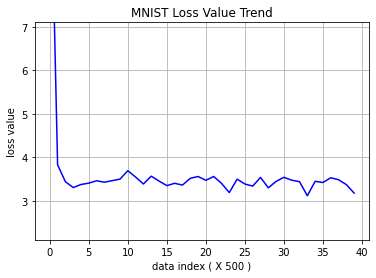

In [17]:
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 500):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500 )')
plt.ylabel('loss value')
plt.grid()
plt.ylim(2.1, 7.1)
plt.plot(Y_DATA_LIST, color='b')
plt.show()

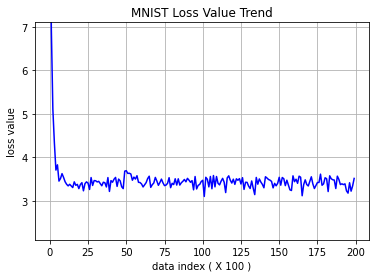

In [18]:
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 100):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 100 )')
plt.ylabel('loss value')
plt.grid()
plt.ylim(2.1, 7.1)
plt.plot(Y_DATA_LIST, color='b')
plt.show()